In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("training.csv", encoding='latin-1', header=None)


In [68]:
# from sklearn.model_selection import train_test_split
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [69]:
df = df.drop([1,2,3,4], axis = 1)
df.columns = ["Sentiment", "Tweet"]

In [70]:
# df[df['Sentiment'] == 4] = 1

In [71]:
df["Sentiment"] = df["Sentiment"].map({0:0, 4:1})

In [72]:
df[df['Sentiment']==1].head() #Positive

,Sentiment,Tweet
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [73]:
df[df['Sentiment']==0].head() #Negative

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["Tweet"], df["Sentiment"], test_size=0.33, random_state=100)

In [77]:
X_train.count()

1072000

In [78]:
X_test.count()

528000

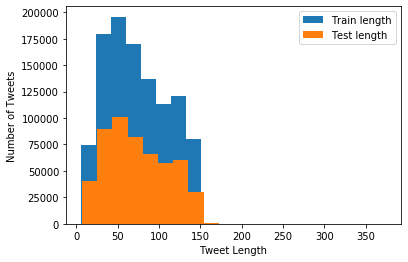

In [79]:
train_length = X_train.str.len()
test_length = X_test.str.len()


plt.hist(train_length, bins=20, label="Train length")
plt.hist(test_length, bins=20, label="Test length")
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.legend()
plt.show()

In [55]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [56]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

## Removing @mentions

In [80]:
%%time
df["clean_tweet"] = np.vectorize(remove_pattern)(df["Tweet"], "@[\w]*")

CPU times: user 44.7 s, sys: 9.54 s, total: 54.2 s
Wall time: 1min 1s


## Removing Special Characters

In [81]:
%%time
df["clean_tweet"] = df["clean_tweet"].str.replace("[^a-zA-Z#]", " ")

CPU times: user 8.23 s, sys: 245 ms, total: 8.48 s
Wall time: 9.17 s


## Removing short words

In [82]:
%%time
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))


CPU times: user 4.93 s, sys: 107 ms, total: 5.04 s
Wall time: 5.36 s


## Tokenizing

In [83]:
%%time
tokenized = df["clean_tweet"].apply(lambda x: x.split())


CPU times: user 3.82 s, sys: 4.45 s, total: 8.28 s
Wall time: 10.4 s


In [84]:
%%time
from nltk.stem import PorterStemmer

ps = PorterStemmer()
tokenized = tokenized.apply(lambda x: [ps.stem(i) for i in x])


CPU times: user 4min 53s, sys: 8.75 s, total: 5min 2s
Wall time: 5min 12s


In [85]:
df.head()

,Sentiment,Tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic Awww that bummer shoulda David Ca...
1,0,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [86]:
%%time

# train["clean_tweet"] = train_tokenized.apply(lambda x: [" ".join(i) for i in x])
# test["clean_tweet"] = test_tokenized.apply(lambda x: [" ".join(i) for i in x])
def tokens_to_str(tokenized):
    for i in range(len(tokenized)):
        tokenized[i] = " ".join(tokenized[i])
    return tokenized
# for i in range(len(tokenized)):
#     tokenized[i] = " ".join(tokenized[i])

df["clean_tweet"] = tokens_to_str(tokenized)
# test["clean_tweet"] = tokens_to_str(test_tokenized)

CPU times: user 1min 40s, sys: 1.35 s, total: 1min 41s
Wall time: 1min 43s


## WordCloud for all tweets

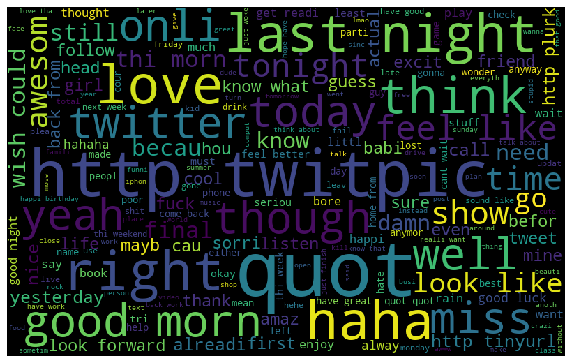

CPU times: user 1min 7s, sys: 5.65 s, total: 1min 13s
Wall time: 1min 15s


In [87]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in df['clean_tweet']])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()

## WordCloud for Negative Tweets

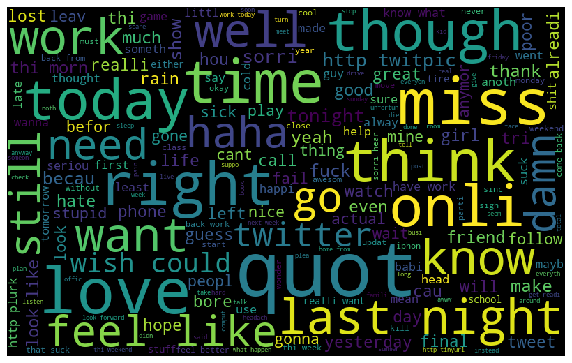

CPU times: user 34.4 s, sys: 1.23 s, total: 35.7 s
Wall time: 36.2 s


In [89]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in df['clean_tweet'][df['Sentiment'] == 0]])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()

## WordCloud for Positive Tweets

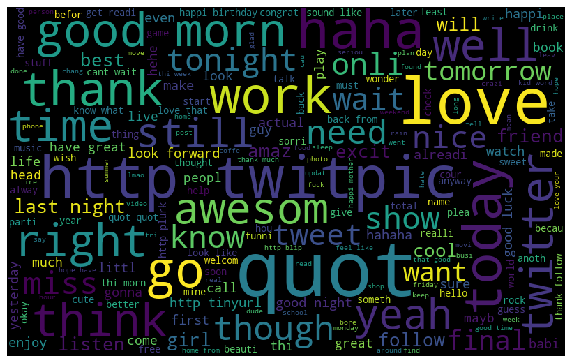

CPU times: user 33 s, sys: 1.36 s, total: 34.4 s
Wall time: 34.9 s


In [90]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in df['clean_tweet'][df['Sentiment'] == 1]])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bag_of_words_vectorizer = CountVectorizer(max_df=200, min_df=2, stop_words='english', max_features=1000)

In [93]:
%%time
bag_of_words = bag_of_words_vectorizer.fit_transform(df['clean_tweet'])

CPU times: user 15.4 s, sys: 647 ms, total: 16.1 s
Wall time: 16.7 s


In [94]:
bag_of_words.shape

(1600000, 1000)

In [95]:
df.head()

,Sentiment,Tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic awww that bummer shoulda david ca...
1,0,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav here becaus over there


In [99]:
%%time
# from gensim.sklearn_api import W2VTransformer

import gensim

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

w2v_model = gensim.models.Word2Vec(tokenized_tweet, size=200, window=7, min_count=2, sg=1, negative=10, workers=2)
# w2v_model = gensim.models.Word2Vec(min_count=2, window=2, size=200, sample=6e-5, alpha=0.05, min_alpha=0.0007, negative=20, workers=2)



CPU times: user 16min 57s, sys: 40.3 s, total: 17min 38s
Wall time: 13min 2s


In [100]:
%%time
w2v_model.train(tokenized_tweet, total_examples=len(df['clean_tweet']), epochs=20)

CPU times: user 1h 3min 12s, sys: 23.8 s, total: 1h 3min 36s
Wall time: 34min 24s


(190267878, 218651040)

In [108]:
w2v_model.wv.most_similar(positive="phone")

[('cell', 0.7204346060752869),
 ('fone', 0.6632765531539917),
 ('text', 0.6539121866226196),
 ('blackberri', 0.6425184011459351),
 ('alltel', 0.6268930435180664),
 ('mobil', 0.6268563866615295),
 ('iphon', 0.616851806640625),
 ('phoneeee', 0.5968560576438904),
 ('chargerrr', 0.5963860154151917),
 ('muthafuck', 0.5944719314575195)]

In [114]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [115]:
%%time
word2vec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    word2vec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

word2vec_df = pd.DataFrame(word2vec_arrays)

/Users/vamshi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


CPU times: user 3min 42s, sys: 8.4 s, total: 3min 50s
Wall time: 4min 25s


In [124]:
w2v_model.wv.similarity("love", "awesome")

0.30514473